#**SISTEM REKOMENDASI HOTEL DI JAKARTA**

#**Capstone Project Team ID CSD-158**

##**Nama Anggota :**

###Ni Putu Ambalika Dewi M014V6059

###Ivanri Fleri Simanjuntak M227R4186

# **Data Understanding**

In [1]:
# Library yang digunakan untuk project ini
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
dataset = pd.read_csv('Hotels_Jakarta.csv')

In [3]:
dataset.head()

,hotel_name,hotel_name_link,review_score,review_score_text,review_score_title,hotel_image,hotel_price
0,Ascott Sudirman Jakarta,\n/hotel/id/ascott-sudirman-jakarta-jakarta.en...,8.7,"1,259 reviews",Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,062,187"
1,Ascott Jakarta,\n/hotel/id/ascott-jakarta.en-gb.html?aid=3041...,8.6,"1,811 reviews",Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 934,725"
2,Four Seasons Hotel Jakarta,\n/hotel/id/four-seasons-jakarta-jakarta.en-gb...,9.2,409 reviews,Superb,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 2,763,882"
3,Shangri-La Hotel Jakarta,\n/hotel/id/shangri-la-jakarta.en-gb.html?aid=...,8.9,685 reviews,Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,667,597"
4,Ascott Kuningan Jakarta,\n/hotel/id/ascott-kuningan-jakarta.en-gb.html...,8.6,865 reviews,Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,274,625"


In [4]:
dataset.shape

(676, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_name          676 non-null    object 
 1   hotel_name_link     676 non-null    object 
 2   review_score        676 non-null    float64
 3   review_score_text   676 non-null    object 
 4   review_score_title  676 non-null    object 
 5   hotel_image         676 non-null    object 
 6   hotel_price         676 non-null    object 
dtypes: float64(1), object(6)
memory usage: 37.1+ KB


#**Exploratory Data Analysis**

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



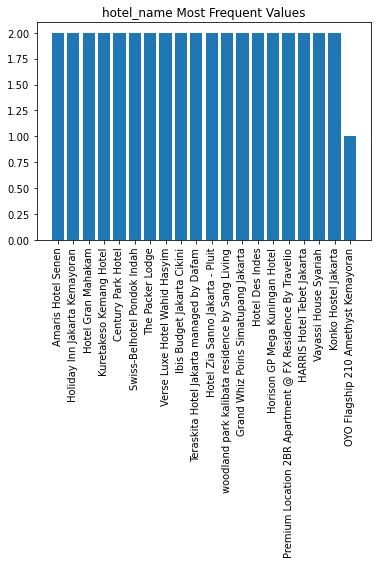

----------------------------------------------------------------------------------------------------


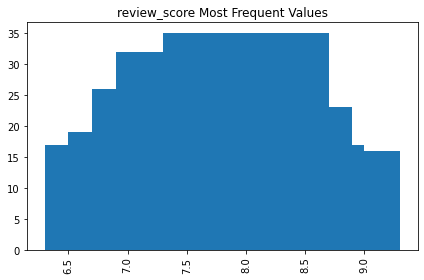

----------------------------------------------------------------------------------------------------


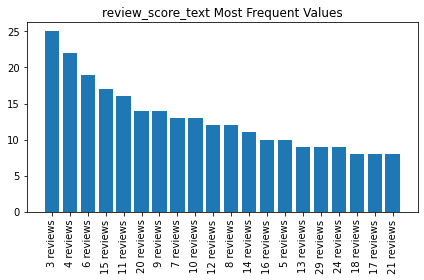

----------------------------------------------------------------------------------------------------


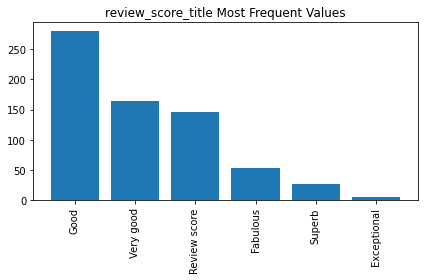

----------------------------------------------------------------------------------------------------


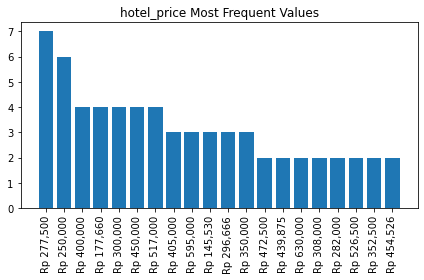

In [6]:
# visualisasi most frequent values di dataset
for column in ('hotel_name', 'review_score', 'review_score_text', 'review_score_title', 'hotel_price'):
    print('-' * 100)
    counts = dataset[column].value_counts().nlargest(20)
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.title(f'{column} Most Frequent Values')
    plt.tight_layout()
    plt.show()

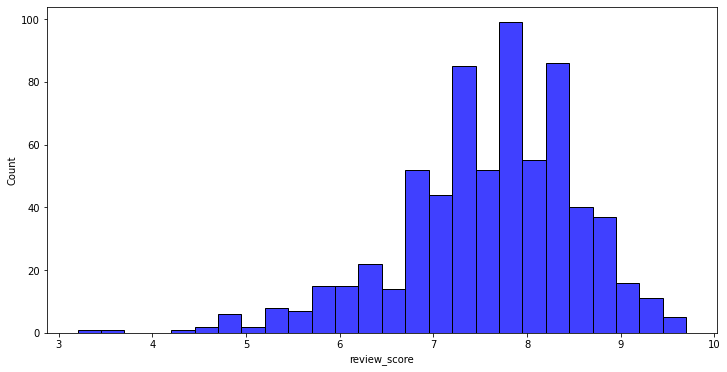

In [7]:
plt.figure(figsize = (12,6))
sns.histplot(dataset, x = dataset['review_score'], color='b')

<function matplotlib.pyplot.plot>

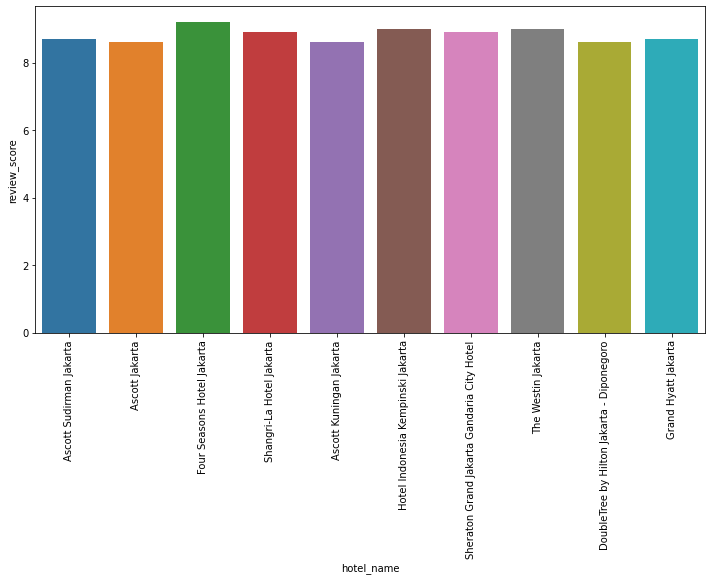

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(x='hotel_name',y='review_score',data=dataset.iloc[:10,:])
plt.xticks(rotation=90)
plt.plot

#**Data Preparation**

In [9]:
dataset.isnull().sum()

hotel_name            0
hotel_name_link       0
review_score          0
review_score_text     0
review_score_title    0
hotel_image           0
hotel_price           0
dtype: int64

In [10]:
datasets = dataset

In [11]:
datasets.isnull().sum()

hotel_name            0
hotel_name_link       0
review_score          0
review_score_text     0
review_score_title    0
hotel_image           0
hotel_price           0
dtype: int64

In [13]:
# Fitur yang digunakan pada project ini
dataset_columns = ['hotel_name', 'review_score_text', 'review_score_title', 'hotel_price']
datasets = datasets[dataset_columns]

In [14]:
# Function yang digunakan untuk mengubah seluruh huruf menjadi huruf kecil
def data_cleaning(x):
  return str.lower(x.replace(" ", ""))

In [15]:
# Menampilkan data cleaning
for dataset_column in dataset_columns:
  datasets[dataset_column] = datasets[dataset_column].apply(data_cleaning)

datasets.head()

,hotel_name,review_score_text,review_score_title,hotel_price
0,ascottsudirmanjakarta,"1,259reviews",fabulous,"rp 1,062,187"
1,ascottjakarta,"1,811reviews",fabulous,"rp 934,725"
2,fourseasonshoteljakarta,409reviews,superb,"rp 2,763,882"
3,shangri-lahoteljakarta,685reviews,fabulous,"rp 1,667,597"
4,ascottkuninganjakarta,865reviews,fabulous,"rp 1,274,625"


#**Modeling**

In [16]:
tfidf = TfidfVectorizer(stop_words='english')

# membuat matriks TF-IDF pada fitting dan transformasi data
tfidf_matrix = tfidf.fit_transform(dataset['review_score_title'])

print(tfidf_matrix.shape)

(676, 6)


In [17]:
# Hitung nilai cosine similarity
cosine_simA = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(dataset.index, index = dataset['hotel_name'])

In [18]:
indices = pd.Series(dataset.index, index = dataset['hotel_name'])

# Function yang digunakan untuk menghasilkan rekomendasi hotel
def hotel_recommendation(hotel_name, cosine_simA = cosine_similarity):
    idx = indices[hotel_name]
    score_similarity = list(enumerate(cosine_simA[idx]))
    score_similarity = sorted(score_similarity, key=lambda x: x[1], reverse=True)
    
    # Digunakan untuk mendapatkan 10 hotel yang paling mirip
    score_similarity = score_similarity[2:12]
    dataset_indices = [i[0] for i in score_similarity]

    return pd.DataFrame(dataset[['hotel_name', 'review_score', 'review_score_title', 'hotel_price']]).iloc[dataset_indices]

In [19]:
# Function yang digunakan untuk menampilkan data asli dari hotel yang dipilih
def hotel_rec(x):
  return dataset[dataset['hotel_name'].str.contains(x)==True]

In [20]:
# Cek Data Asli
hotel_rec("Ascott Jakarta")

,hotel_name,hotel_name_link,review_score,review_score_text,review_score_title,hotel_image,hotel_price
1,Ascott Jakarta,\n/hotel/id/ascott-jakarta.en-gb.html?aid=3041...,8.6,"1,811 reviews",Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 934,725"


In [21]:
# Hasil 10 hotel rekomendasi
hotel_recommendation('Ascott Jakarta', cosine_simA)

,hotel_name,review_score,review_score_title,hotel_price
3,Shangri-La Hotel Jakarta,8.9,Fabulous,"Rp 1,667,597"
4,Ascott Kuningan Jakarta,8.6,Fabulous,"Rp 1,274,625"
6,Sheraton Grand Jakarta Gandaria City Hotel,8.9,Fabulous,"Rp 1,742,400"
8,DoubleTree by Hilton Jakarta - Diponegoro,8.6,Fabulous,"Rp 898,425"
9,Grand Hyatt Jakarta,8.7,Fabulous,"Rp 1,682,256"
18,Stanley Wahid Hasyim,8.6,Fabulous,"Rp 389,911"
21,Swissôtel Jakarta PIK Avenue,8.9,Fabulous,"Rp 889,199"
24,Hotel Mulia Senayan - Jakarta,8.8,Fabulous,"Rp 1,707,010"
28,Fraser Place Setiabudi Jakarta,8.9,Fabulous,"Rp 1,090,264"
39,Morrissey Hotel Residences,8.6,Fabulous,"Rp 605,440"


In [22]:
import pickle

In [23]:
pickle.dump(dataset,open('dataset.pkl','wb'))
pickle.dump(cosine_simA,open('cosine_simA.pkl','wb'))